<h3>Import packages for data understanding and exploratory data analysis</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<h3>Get the data</h3>

In [2]:
data = pd.read_csv('dataset/data.csv')

data.shape

(4250, 20)

<p>The training dataset contains 4250 samples. Each sample contains 19 features and 1 boolean variable "churn" which indicates the class of the sample. The 19 input features and 1 target variable are:</p>

<ol>
    <li>"state", string. 2-letter code of the US state of customer residence</li>
    <li>"account_length", numerical. Number of months the customer has been with the current telco provider</li>
    <li>"area_code", string="area_code_AAA" where AAA = 3 digit area code</li>
    <li>"international_plan", (yes/no). The customer has international plan</li>
    <li>"voice_mail_plan", (yes/no). The customer has voice mail plan</li>
    <li>"number_vmail_messages", numerical. Number of voice-mail messages</li>
    <li>"total_day_minutes", numerical. Total minutes of day calls</li>
    <li>"total_day_calls", numerical. Total number of day calls</li>
    <li>"total_day_charge", numerical. Total charge of day calls</li>
    <li>"total_eve_minutes", numerical. Total minutes of evening calls</li>
    <li>"total_eve_calls", numerical. Total number of evening calls</li>
    <li>"total_eve_charge", numerical. Total charge of evening calls</li>
    <li>"total_night_minutes", numerical. Total minutes of night calls</li>
    <li>"total_night_calls", numerical. Total number of night calls</li>
    <li>"total_night_charge", numerical. Total charge of night calls</li>
    <li>"total_intl_minutes", numerical. Total minutes of international calls</li>
    <li>"total_intl_calls", numerical. Total number of international calls</li>
    <li>"total_intl_charge", numerical. Total charge of international calls</li>
    <li>"number_customer_service_calls", numerical. Number of calls to customer service</li>
    <li>"churn", (yes/no). Customer churn - target variable</li>
</ol>

<p>The data is acquired from <a href='https://www.kaggle.com/c/customer-churn-prediction-2020/data'>Kaggle</a></p>

<h3>Short inspection of the data</h3>

In [3]:
#sneak peek at the data
data.head()

state  account_length      area_code international_plan voice_mail_plan  \
0    OH             107  area_code_415                 no             yes   
1    NJ             137  area_code_415                 no              no   
2    OH              84  area_code_408                yes              no   
3    OK              75  area_code_415                yes              no   
4    MA             121  area_code_510                 no             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41.38              121.2              110             10.30   
2             50.90               61.9               88              5.26   
3             28.34              148.3              122             12.61   
4             37.09              348.5              108             29.62   

   total_night_minutes  total_night_calls  total_night_charge  \
0                254.4                103               11.45   
1                162.6                104                7.32   
2                196.9                 89                8.86   
3                186.9                121                8.41   
4                212.6                118                9.57   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                13.7                 3               3.70   
1                12.2                 5               3.29   
2                 6.6                 7               1.78   
3                10.1                 3               2.73   
4                 7.5                 7               2.03   

   number_customer_service_calls churn  
0                              1    no  
1                              0    no  
2                              2    no  
3                              3    no  
4                              3    no

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

<p>Luckily, we don't have any null values</p>

In [5]:
#let's see the statistical figures of numerical features
data.describe()

account_length  number_vmail_messages  total_day_minutes  \
count     4250.000000            4250.000000        4250.000000   
mean       100.236235               7.631765         180.259600   
std         39.698401              13.439882          54.012373   
min          1.000000               0.000000           0.000000   
25%         73.000000               0.000000         143.325000   
50%        100.000000               0.000000         180.450000   
75%        127.000000              16.000000         216.200000   
max        243.000000              52.000000         351.500000   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
count      4250.000000       4250.000000        4250.000000      4250.000000   
mean         99.907294         30.644682         200.173906       100.176471   
std          19.850817          9.182096          50.249518        19.908591   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.365000         165.925000        87.000000   
50%         100.000000         30.680000         200.700000       100.000000   
75%         113.000000         36.750000         233.775000       114.000000   
max         165.000000         59.760000         359.300000       170.000000   

       total_eve_charge  total_night_minutes  total_night_calls  \
count       4250.000000          4250.000000        4250.000000   
mean          17.015012           200.527882          99.839529   
std            4.271212            50.353548          20.093220   
min            0.000000             0.000000           0.000000   
25%           14.102500           167.225000          86.000000   
50%           17.060000           200.450000         100.000000   
75%           19.867500           234.700000         113.000000   
max           30.540000           395.000000         175.000000   

       total_night_charge  total_intl_minutes  total_intl_calls  \
count         4250.000000         4250.000000       4250.000000   
mean             9.023892           10.256071          4.426353   
std              2.265922            2.760102          2.463069   
min              0.000000            0.000000          0.000000   
25%              7.522500            8.500000          3.000000   
50%              9.020000           10.300000          4.000000   
75%             10.560000           12.000000          6.000000   
max             17.770000           20.000000         20.000000   

       total_intl_charge  number_customer_service_calls  
count        4250.000000                    4250.000000  
mean            2.769654                       1.559059  
std             0.745204                       1.311434  
min             0.000000                       0.000000  
25%             2.300000                       1.000000  
50%             2.780000                       1.000000  
75%             3.240000                       2.000000  
max             5.400000                       9.000000

<p>There is something odd with <strong>number_vmail_messages</strong> column. Let's check it further, later</p>

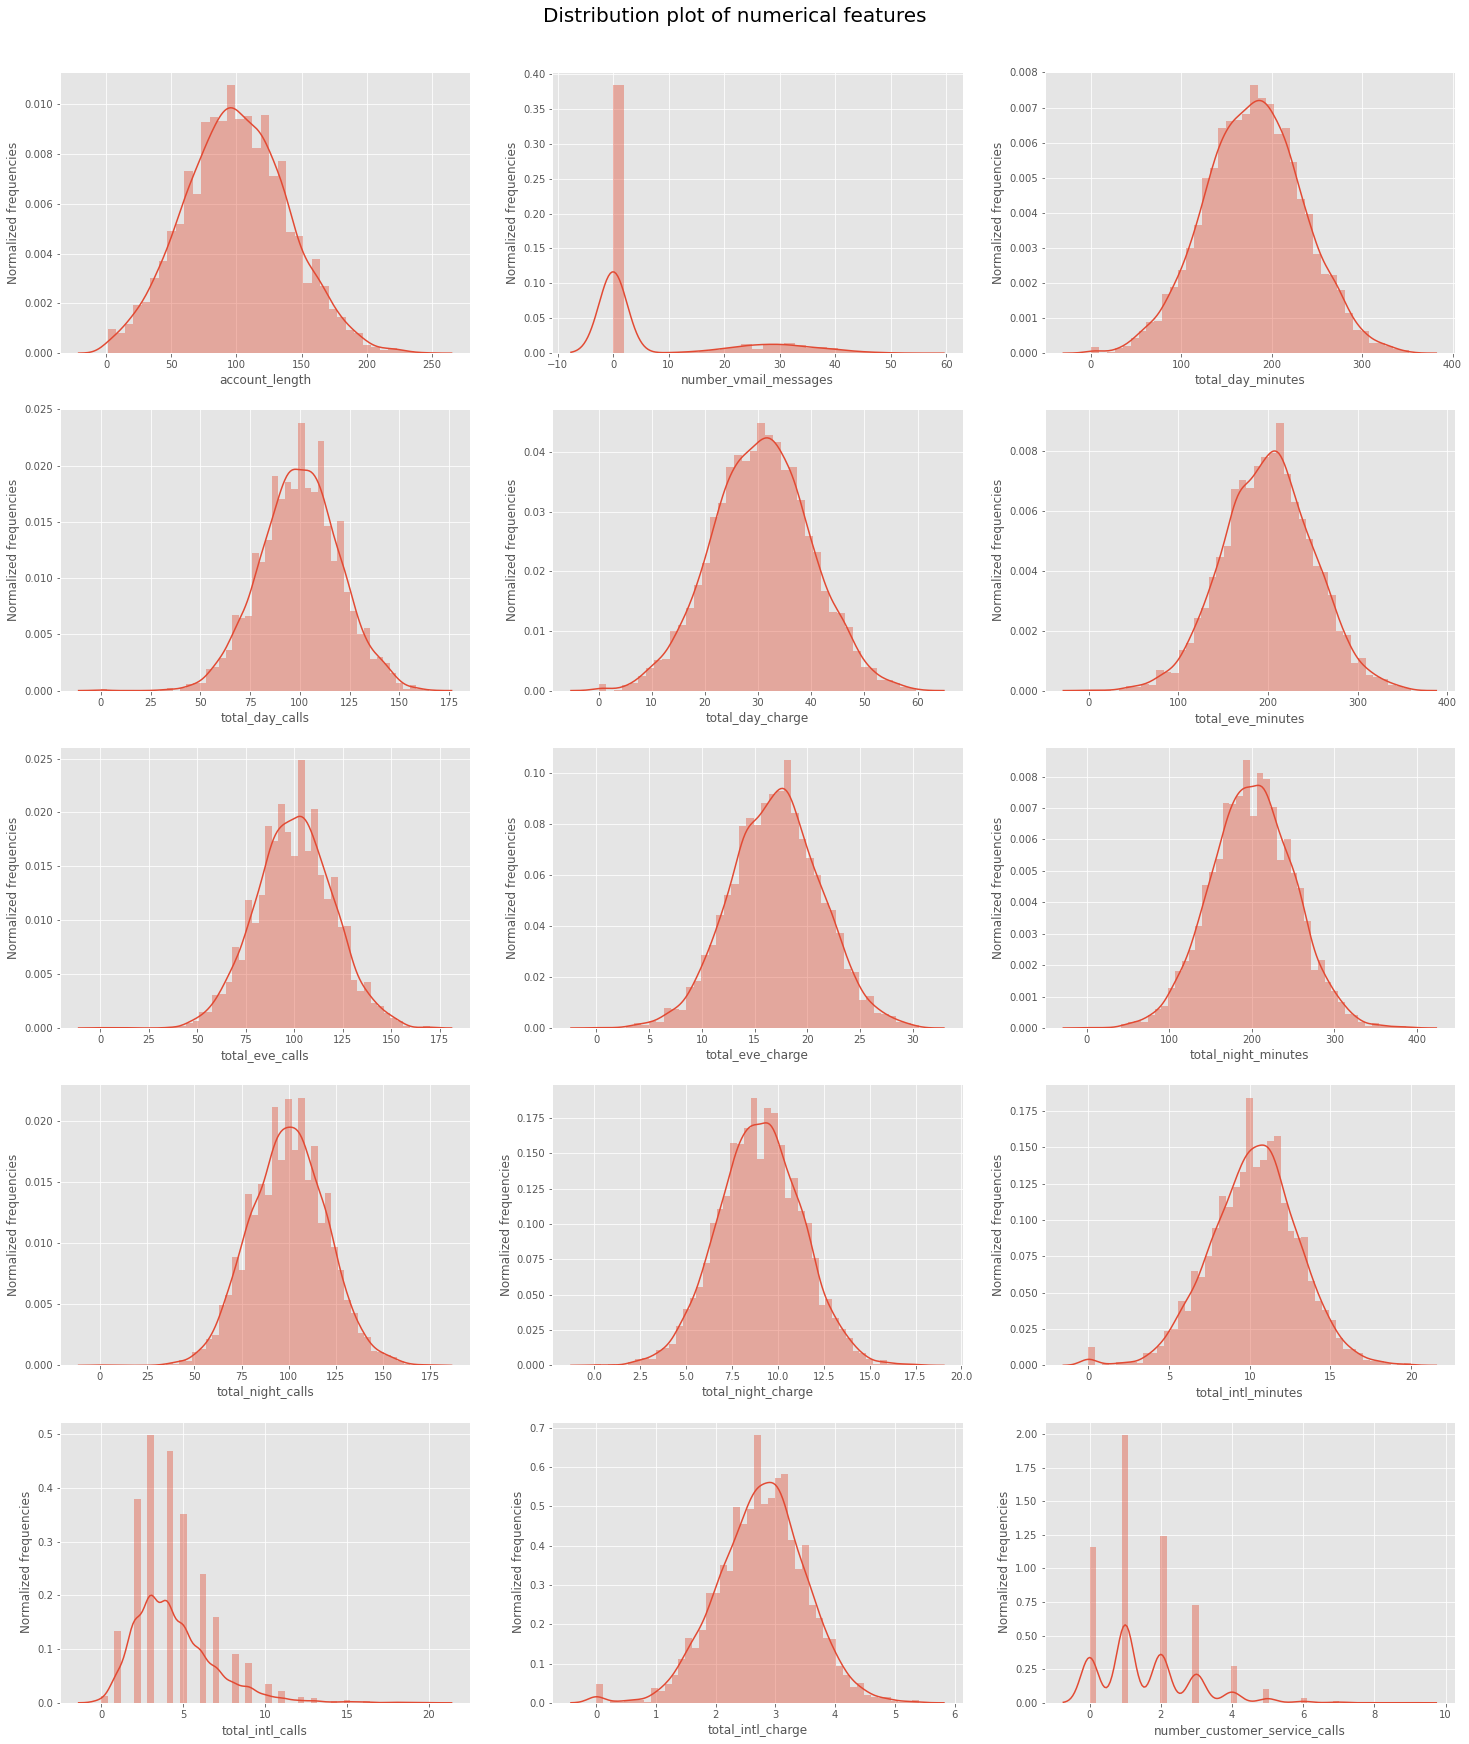

In [6]:
#check the value distribution of numerical features
numerical_cols = ['account_length', 'number_vmail_messages', 'total_day_minutes',
                 'total_day_calls', 'total_day_charge', 'total_eve_minutes',
                 'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
                 'total_night_calls', 'total_night_charge', 'total_intl_minutes',
                 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']

fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(25, 30))
ax = ax.ravel()

for i in range(len(numerical_cols)):
    sns.distplot(data[numerical_cols[i]], ax=ax[i])
    ax[i].set_ylabel('Normalized frequencies')

fig.suptitle('Distribution plot of numerical features', fontsize=20, y=0.91);

<p>Most of the distribution of our data features follow Gaussian distribution</p>

<h3>Data split into train-test set</h3>

<p>Before going further into data exploration, it will be better if we split the data first into train-test (80-20) set, so that we can avoid <i>data snooping</i> bias</p>

In [7]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2 , stratify=data['churn'])

In [8]:
#making sure that the proportion of each dataset is as desired
train_prc = len(train) / len(data) * 100
test_prc = len(test) / len(data) * 100

print("""Proportion of each dataset:
         Train: {}%
         Test: {}%""".format(train_prc, test_prc))

Proportion of each dataset:
         Train: 80.0%
         Test: 20.0%


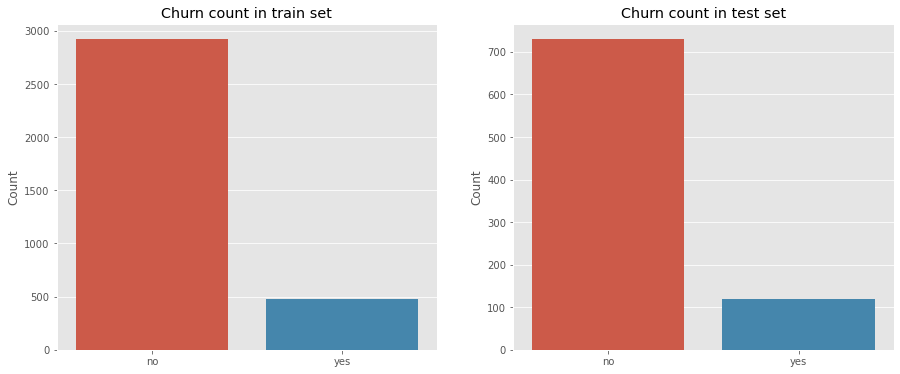

In [9]:
#to see whether the distribution of churn count is similar across the dataset
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
ax = ax.ravel()

sns.barplot(x=train['churn'].value_counts().index, y=train['churn'].value_counts(), ax=ax[0])
ax[0].set_ylabel('Count')
ax[0].set_title('Churn count in train set')

sns.barplot(x=test['churn'].value_counts().index, y=test['churn'].value_counts(), ax=ax[1])
ax[1].set_ylabel('Count')
ax[1].set_title('Churn count in test set')

plt.show()

<h3>Exploratory data analysis</h3>

In [10]:
train.head()

state  account_length      area_code international_plan voice_mail_plan  \
1131    WY              97  area_code_510                yes              no   
1695    PA              28  area_code_415                 no              no   
178     FL             120  area_code_415                 no              no   
3207    UT              80  area_code_415                 no             yes   
3432    WV             100  area_code_408                 no              no   

      number_vmail_messages  total_day_minutes  total_day_calls  \
1131                      0              236.9              107   
1695                      0              168.2               87   
178                       0              180.0               80   
3207                     33              189.4              109   
3432                      0              239.1               96   

      total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
1131             40.27              157.6              105             13.40   
1695             28.59              161.7               92             13.74   
178              30.60              224.2               82             19.06   
3207             32.20              148.7               68             12.64   
3432             40.65              180.1              110             15.31   

      total_night_minutes  total_night_calls  total_night_charge  \
1131                241.0                120               10.85   
1695                192.4                112                8.66   
178                 265.4                 91               11.94   
3207                208.9                119                9.40   
3432                259.2                112               11.66   

      total_intl_minutes  total_intl_calls  total_intl_charge  \
1131                 7.3                 2               1.97   
1695                10.1                 3               2.73   
178                  4.7                 7               1.27   
3207                11.2                 4               3.02   
3432                14.0                 2               3.78   

      number_customer_service_calls churn  
1131                              0   yes  
1695                              3    no  
178                               3    no  
3207                              1   yes  
3432                              0    no

In [11]:
#visualizing the distribution of customer across state
states = train['state'].value_counts().index
state_counts = train['state'].value_counts().values

import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=states,
    z = state_counts,
    locationmode = 'USA-states',
    colorscale = 'Reds',
    colorbar_title = "Count",
))

fig.update_layout(
    title={
        'text': "Number of Customers Across The State",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    geo_scope='usa',
)

fig.show()

<p>There is no obvious pattern of customer distribution across the state, but we can see that there is a high number of customer concentrated in West Virginia</p>

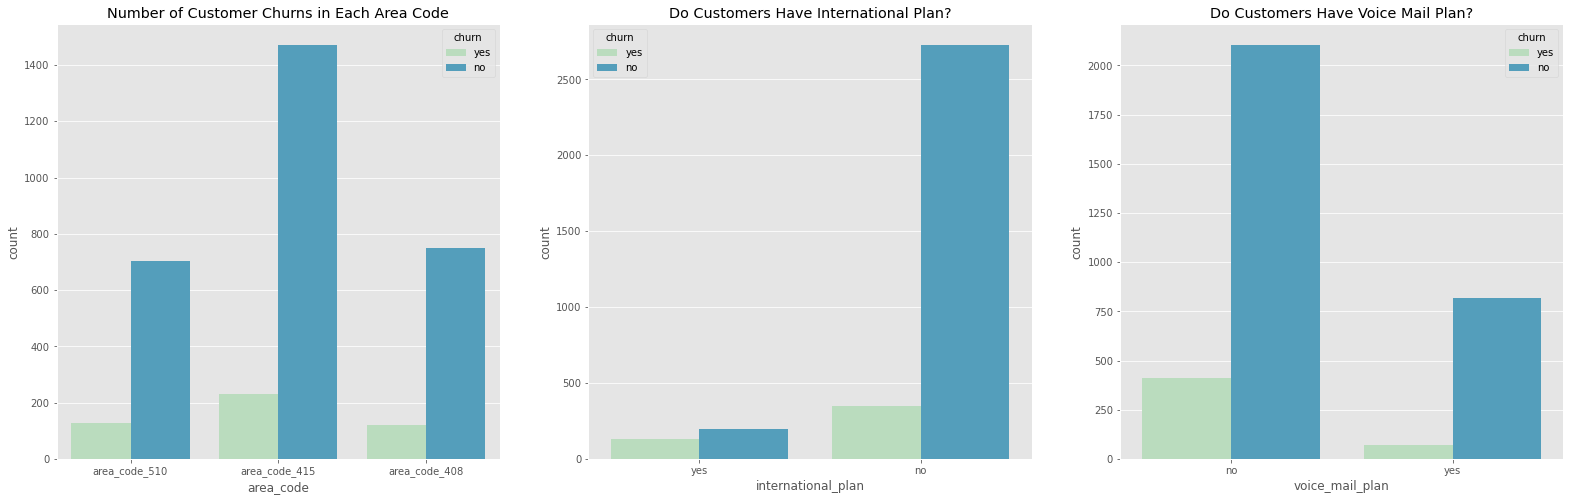

In [12]:
#inspecting the categorical features
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(27, 8))
ax = ax.ravel()

sns.countplot(x='area_code', hue='churn', data=train, palette='GnBu', ax=ax[0])
ax[0].set_title('Number of Customer Churns in Each Area Code')

sns.countplot(x='international_plan', hue='churn', data=train, palette='GnBu', ax=ax[1])
ax[1].set_title('Do Customers Have International Plan?')

sns.countplot(x='voice_mail_plan', hue='churn', data=train, palette='GnBu', ax=ax[2])
ax[2].set_title('Do Customers Have Voice Mail Plan?')

plt.show()

<Figure size 360x360 with 0 Axes>

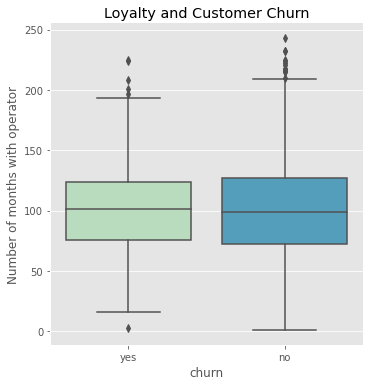

In [13]:
plt.figure(figsize=(5, 5))
sns.catplot(data=train[['account_length', 'churn']], x='churn', y='account_length', kind="box", palette='GnBu')
plt.title("Loyalty and Customer Churn")
plt.ylabel("Number of months with operator")
plt.show();

<p>From the boxplot above, we don't see any specific correlation between how long customers have stayed with the operator and their churning behavior</p>

<Figure size 360x360 with 0 Axes>

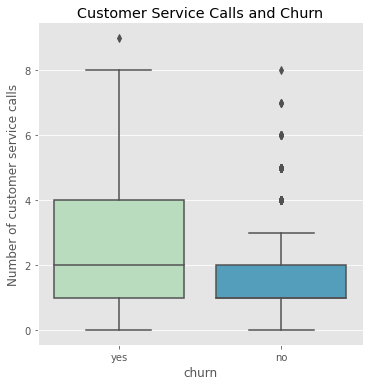

In [14]:
plt.figure(figsize=(5, 5))
sns.catplot(data=train, x='churn', y='number_customer_service_calls', kind="box", palette='GnBu')
plt.title("Customer Service Calls and Churn")
plt.ylabel("Number of customer service calls");

<p>It seems that the customers who are frequently called customer service tend to churn out more rather than the customers who didn't. It might indicate that they have more issues regarding the operator and have not been assisted properly which makes them churned. More than 50% of churned customers had called the customer service at least twice</p>

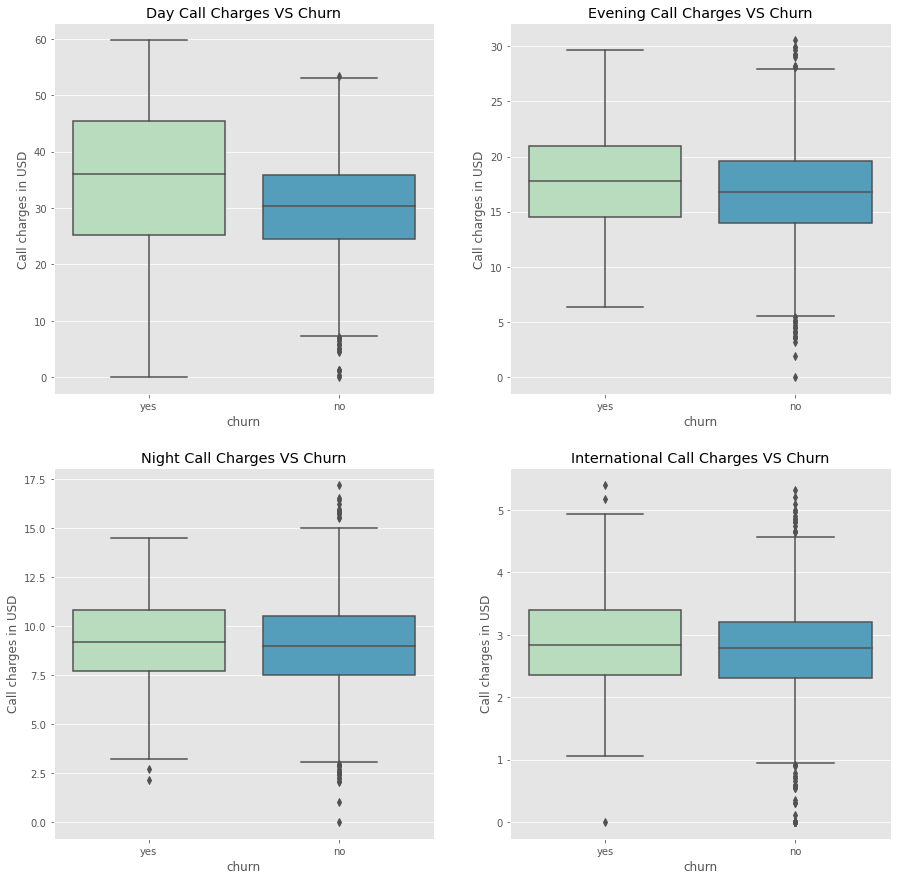

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
ax = ax.ravel()

titles = ['Day Call Charges', 'Evening Call Charges', 'Night Call Charges', 'International Call Charges']
cols = ['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge']

for i in range(4):
    sns.boxplot(x='churn', y=cols[i], data=train, palette='GnBu', ax=ax[i])
    ax[i].set_title(titles[i] + ' VS Churn')
    ax[i].set_ylabel('Call charges in USD')

<p>We could see from the boxplots above that the average <strong>total_day_charge</strong> are ~7-8 USD more for the customers who churned. This might be a leading reason why most of the customers have left. For the rest of the call charges, the behavior is more or less the same for either customer who has churned or not</p>

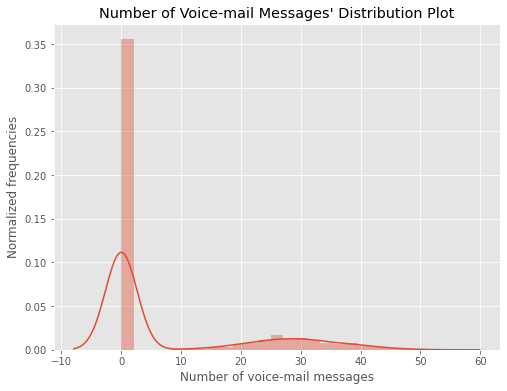

In [16]:
fig = plt.subplots(figsize=(8, 6))
sns.distplot(train['number_vmail_messages'])
plt.ylabel('Normalized frequencies')
plt.xlabel('Number of voice-mail messages')
plt.title("Number of Voice-mail Messages' Distribution Plot")
plt.show()

In [17]:
train['number_vmail_messages'].describe()

count    3400.000000
mean        7.605000
std        13.432806
min         0.000000
25%         0.000000
50%         0.000000
75%        16.000000
max        52.000000
Name: number_vmail_messages, dtype: float64

<p>As we've seen before, most of our customers don't have any voice-mail messages. I assume that whether our customers check their voice-mail messages frequently so that there is nothing left unheard or just left it on the voice mailbox</p>

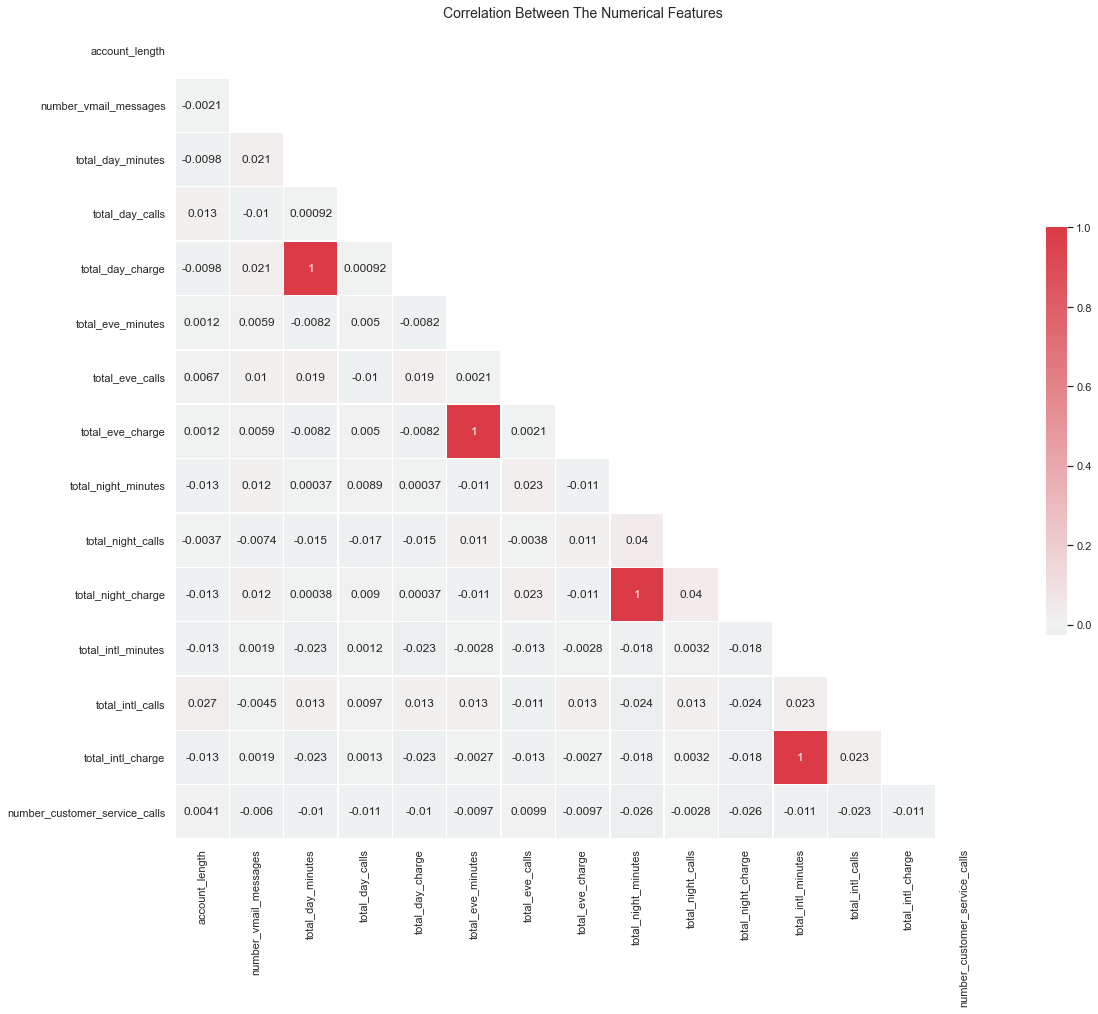

In [18]:
#check correlation between numerical features
sns.set(style="white")

#generate a mask for the upper triangle
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

#generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#draw the heatmap with the mask and correct aspect ratio
sns.heatmap(train.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Between The Numerical Features', fontsize=14)
plt.show();

<p>Most of our numerical features have no significant correlation with each other. However, [total_day_charge, total_day_minutes], [total_eve_charge, total_eve_minutes], [total_night_charge, total_night_minutes], and [total_intl_charge, total_intl_minutes] have perfect score of correlation. We have redundant features that might harm the performance of our model in the future. Therefore, we have to discard one variable from each of those variable pairs</p>

In [19]:
state_count1 = train[['state','churn']]
state_churn = state_count1[state_count1['churn'] == 'yes'].groupby('state', as_index=False).count()

state_count2 = train[['state', 'churn']].groupby('state', as_index=False).count()
state_count2.rename(columns={"churn":"total_cust"},inplace=True)

state_churn['total_cust'] = state_count2['total_cust']
state_churn['%churn'] = state_churn['churn'] / state_churn['total_cust'] * 100

import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations = state_churn['state'],
    z = state_churn['%churn'].astype(float),
    locationmode = 'USA-states',
    colorscale = 'Reds',
    colorbar_title = "Churn percentage",
))

fig.update_layout(
    title={
        'text': "Customers Churn Percentage for Each State",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    geo_scope='usa',
)

fig.show()

<p>New Jersey and California has the highest percentage of customer churn (~28%) followed by Washington (23%)</p> 

<h3>Data preparation</h3>

In [20]:
train['international_plan'] = np.where(train['international_plan'].str.contains('yes'), 1, 0)
train['voice_mail_plan'] = np.where(train['voice_mail_plan'].str.contains('yes'), 1, 0)
train['churn'] = np.where(train['churn'].str.contains('yes'), 1, 0)
train = train.drop(['state', 'total_day_charge', 'total_eve_minutes', 'total_night_charge', 'total_intl_minutes'], axis=1)
train = pd.get_dummies(train, columns=['area_code'], drop_first=True)


test['international_plan'] = np.where(test['international_plan'].str.contains('yes'), 1, 0)
test['voice_mail_plan'] = np.where(test['voice_mail_plan'].str.contains('yes'), 1, 0)
test['churn'] = np.where(test['churn'].str.contains('yes'), 1, 0)
test = test.drop(['state', 'total_day_charge', 'total_eve_minutes', 'total_night_charge', 'total_intl_minutes'], axis=1)
test = pd.get_dummies(test, columns=['area_code'], drop_first=True)

In [21]:
train.head()

account_length  international_plan  voice_mail_plan  \
1131              97                   1                0   
1695              28                   0                0   
178              120                   0                0   
3207              80                   0                1   
3432             100                   0                0   

      number_vmail_messages  total_day_minutes  total_day_calls  \
1131                      0              236.9              107   
1695                      0              168.2               87   
178                       0              180.0               80   
3207                     33              189.4              109   
3432                      0              239.1               96   

      total_eve_calls  total_eve_charge  total_night_minutes  \
1131              105             13.40                241.0   
1695               92             13.74                192.4   
178                82             19.06                265.4   
3207               68             12.64                208.9   
3432              110             15.31                259.2   

      total_night_calls  total_intl_calls  total_intl_charge  \
1131                120                 2               1.97   
1695                112                 3               2.73   
178                  91                 7               1.27   
3207                119                 4               3.02   
3432                112                 2               3.78   

      number_customer_service_calls  churn  area_code_area_code_415  \
1131                              0      1                        0   
1695                              3      0                        1   
178                               3      0                        1   
3207                              1      1                        1   
3432                              0      0                        0   

      area_code_area_code_510  
1131                        1  
1695                        0  
178                         0  
3207                        0  
3432                        0

In [22]:
test.head()

account_length  international_plan  voice_mail_plan  \
770               65                   0                0   
1153              64                   0                0   
94               125                   0                0   
1901             117                   0                1   
2585             149                   0                0   

      number_vmail_messages  total_day_minutes  total_day_calls  \
770                       0              111.0               51   
1153                      0              206.2               76   
94                        0              126.7              108   
1901                     13              207.6               65   
2585                      0              175.4               80   

      total_eve_calls  total_eve_charge  total_night_minutes  \
770                84             18.68                202.0   
1153               76             19.75                251.6   
94                 90             17.51                247.8   
1901               77             12.98                232.8   
2585              127             16.78                188.2   

      total_night_calls  total_intl_calls  total_intl_charge  \
770                  89                14               1.19   
1153                 96                 2               3.67   
94                  114                 7               3.59   
1901                 95                 3               2.62   
2585                102                 2               2.62   

      number_customer_service_calls  churn  area_code_area_code_415  \
770                               1      0                        1   
1153                              1      0                        1   
94                                1      0                        0   
1901                              1      0                        0   
2585                              2      0                        0   

      area_code_area_code_510  
770                         0  
1153                        0  
94                          0  
1901                        0  
2585                        0

In [24]:
train.to_csv('dataset/train.csv', index=False)

In [25]:
test.to_csv('dataset/test.csv', index=False)